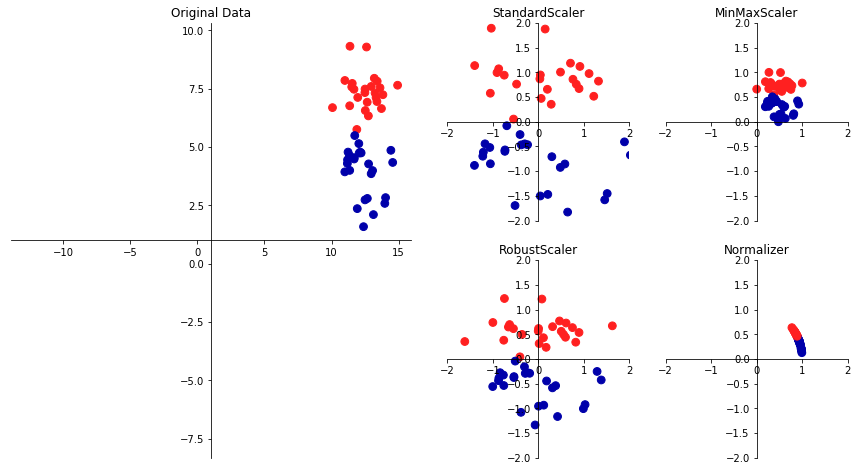

In [94]:
# Preprocessing
import mglearn

mglearn.plots.plot_scaling()

In [95]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1,
                                                    stratify=cancer.target)
print("=========================== Data training before scaling ===============================\n")
print("Shape of X_train before scaling: {}".format(X_train.shape))
print("Per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("Per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("=========================== Data Testing before scaling ===============================\n")
print("Shape of X_train before scaling: {}".format(X_test.shape))
print("Per-feature minimum before scaling:\n {}".format(X_test.min(axis=0)))
print("Per-feature maximum before scaling:\n {}".format(X_test.max(axis=0)))

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
# Transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Show
print("=========================== Data training afrer scaling ===============================\n")
print("Shape of X_train after scaling: {}".format(X_train_scaled.shape))
print("Per-feature minimum before scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("Per-feature maximum before scaling:\n {}".format(X_train_scaled.max(axis=0)))
print("=========================== Data testing afrer scaling ===============================\n")
print("Shape of X_train after scaling: {}".format(X_test_scaled.shape))
print("Per-feature minimum before scaling:\n {}".format(X_test_scaled.min(axis=0)))
print("Per-feature maximum before scaling:\n {}".format(X_test_scaled.max(axis=0)))

=========================== Data training before scaling ===============================

Shape of X_train before scaling: (426, 30)
Per-feature minimum before scaling:
 [6.981e+00 1.038e+01 4.379e+01 1.435e+02 5.263e-02 2.650e-02 0.000e+00
 0.000e+00 1.167e-01 5.025e-02 1.144e-01 3.602e-01 7.570e-01 6.802e+00
 2.667e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 9.502e-04 7.930e+00
 1.249e+01 5.041e+01 1.852e+02 8.409e-02 4.327e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
Per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.264e-01
 1.913e-01 2.906e-01 9.575e-02 2.873e+00 3.647e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 5.774e-01 2.075e-01]
=========================== Data Testing before scaling ===============================

Shape of X_train before scaling: (143, 30)
Per-feature minimum before scaling:
 [8.597e+00 9

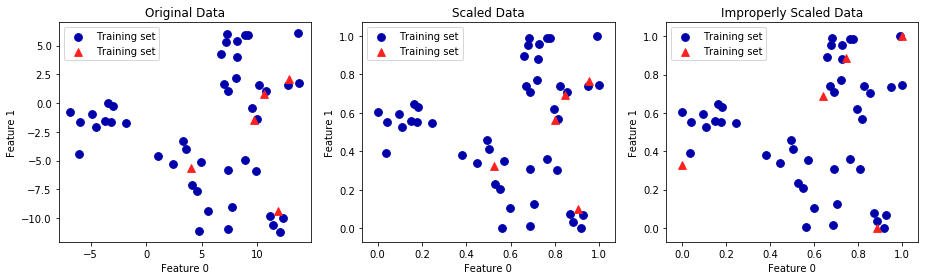

In [96]:
# Scaling Training and test data the same way
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import mglearn

X, y = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# Visualize original data
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=[mglearn.cm2(0)], label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=[mglearn.cm2(1)], label="Training set", s=60)
axes[0].legend(loc='best')
axes[0].set_title('Original Data')

# Visualize scaled data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=[mglearn.cm2(0)], label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=[mglearn.cm2(1)], label="Training set", s=60)
axes[1].legend(loc='best')
axes[1].set_title('Scaled Data')

# Visualize wrongly scaled data
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scale_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=[mglearn.cm2(0)], label="Training set", s=60)
axes[2].scatter(X_test_scale_badly[:, 0], X_test_scale_badly[:, 1], marker='^', c=[mglearn.cm2(1)],
                label="Training set", s=60)
axes[2].legend(loc='best')
axes[2].set_title('Improperly Scaled Data')

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

In [97]:
# The effect of preprocessing on supervised learning
print("================ MinMaxScaler =================\n")
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100, gamma='auto')
svm.fit(X_train, y_train)
print("Test set accuracy before scaling data: {:.2f}".format(svm.score(X_test, y_test)))
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print("Test set accuracy after scaling data: {:.2f}".format(svm.score(X_test_scaled, y_test)))
from sklearn.preprocessing import StandardScaler
print("\n=============== StandardScaler ================\n")
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print("Test set accuracy before scaling data: {:.2f}".format(svm.score(X_test, y_test)))
print("Test set accuracy after scaling data: {:.2f}".format(svm.score(X_test_scaled, y_test)))

================ MinMaxScaler =================

Test set accuracy before scaling data: 0.63
Test set accuracy after scaling data: 0.97

=============== StandardScaler ================

Test set accuracy before scaling data: 0.63
Test set accuracy after scaling data: 0.96


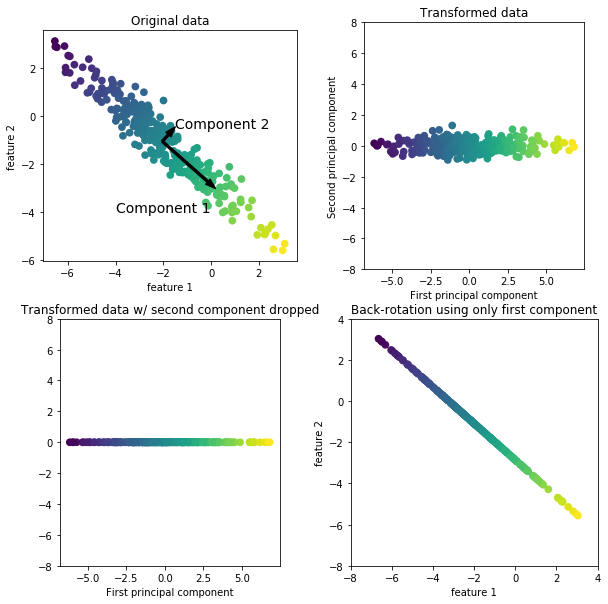

In [98]:
# Principal Component Analysis (PCA)
# Illustration
mglearn.plots.plot_pca_illustration()

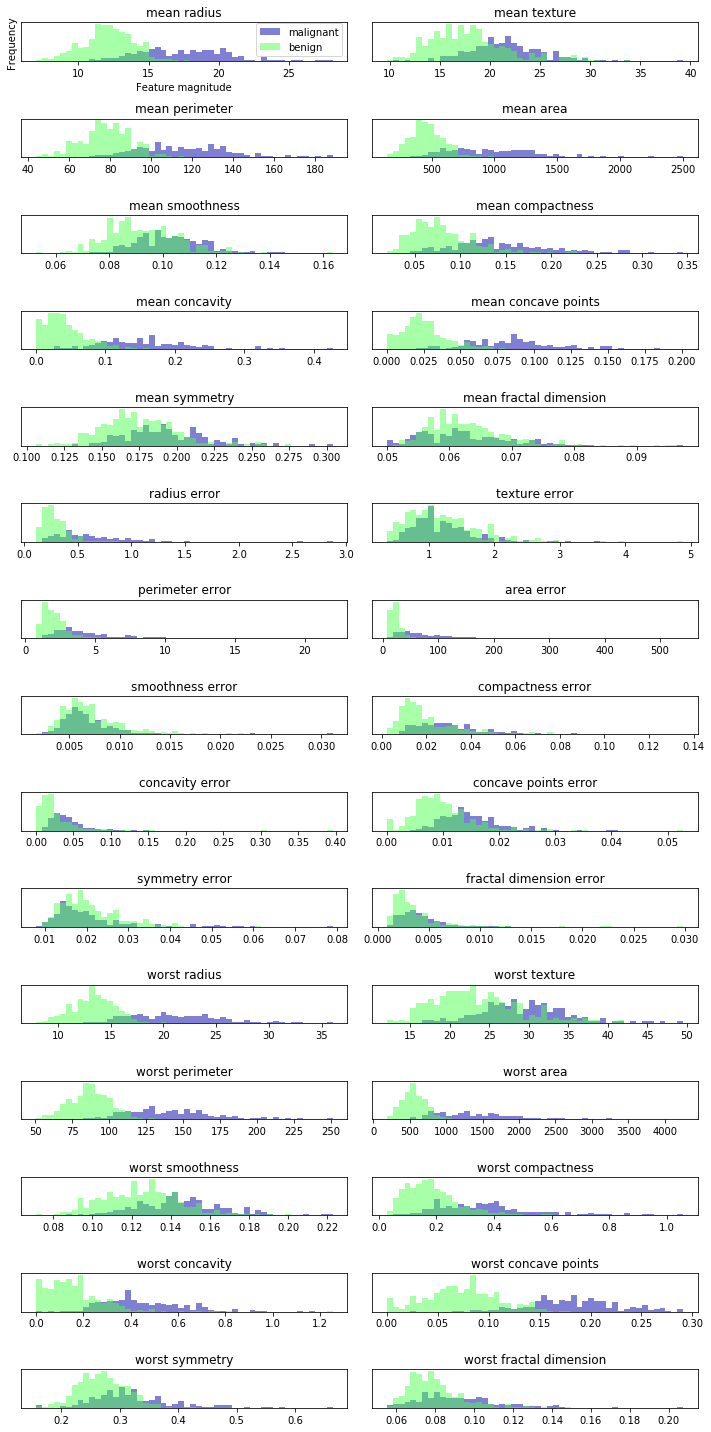

In [99]:
# Show histogram of feature of cancer datasets
import numpy as np

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()